<a href="https://colab.research.google.com/github/Thipwadee/data-mining/blob/main/Quiz_633020982_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ศึกษาข้อมูล

In [149]:
adult = pd.read_csv('/content/adult-data.csv', sep=", ", na_values="?", keep_default_na=False)
adult

<ipython-input-149-4b75694c6c75>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult = pd.read_csv('/content/adult-data.csv', sep=", ", na_values="?", keep_default_na=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


1.ขนาดของข้อมูลคือเท่าไร

In [138]:
adult.shape

(32561, 15)

2.ตัวแปรที่มี

In [139]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

3.หาสถิติเบื้องต้นของตัวแปรเชิงปริมาณ

In [140]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


4.หาสถิติเบื้องต้นของตัวแปรเชิงคุณภาพ (ฐานนิยม)

In [141]:
adult.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#สำรวจค่าสูญหาย

1.ค่าสูญหายถูกแทนด้วยสัญลักษณ์อะไร?

ถูกแทนด้วย '?'

 2.มีค่าสูญหายจำนวนเท่าไหร่ในแต่ละคอลัมน์

In [152]:
adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [153]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


ค่าสูญหายมีในตัวแปร workclass  , occupation และ  native-country

3.แทนค่าสูญหายด้วย mean/median/mode

In [82]:
adult[['workclass']].dropna().mode().iloc[0,0]

'Private'

In [83]:
adult[['workclass']] = adult[['workclass']] .fillna(adult[['workclass']].dropna().mode().iloc[0,0])

In [84]:
adult[['occupation']].dropna().mode().iloc[0,0]

'Prof-specialty'

In [85]:
adult[['occupation']] = adult[['occupation']].fillna(adult[['occupation']].dropna().mode().iloc[0,0])

In [86]:
adult[['native-country']].dropna().mode().iloc[0,0]

'United-States'

In [87]:
adult[['native-country']] = adult[['native-country']].fillna(adult[['native-country']].dropna().mode().iloc[0,0])

In [88]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#ตอบคำถาม

1.ตัวอย่างมีถิ่นกำเนิดที่ประเทศใดบ้าง? มีคนไทยกี่คน?

In [89]:
set(adult['native-country'])

{'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(Guam-USVI-etc)',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto-Rico',
 'Scotland',
 'South',
 'Taiwan',
 'Thailand',
 'Trinadad&Tobago',
 'United-States',
 'Vietnam',
 'Yugoslavia'}

In [91]:
adult[adult['native-country']=='Thailand'].count()

age               18
workclass         18
fnlwgt            18
education         18
education-num     18
marital-status    18
occupation        18
relationship      18
race              18
sex               18
capital-gain      18
capital-loss      18
hours-per-week    18
native-country    18
income            18
dtype: int64

2.สร้างตัวแปร capital-total = capital-gain - capital-loss

In [92]:
adult["capital-total"] = adult['capital-gain']- adult['capital-loss']

In [93]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-total
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


3.ตัวอย่างที่ถิ่นกำเนิดใดมีค่าเฉลี่ยของ capital-total มากที่สุด

In [101]:
adult.groupby(['native-country'])[['capital-total']].mean()

,capital-total
native-country,
Cambodia,844.789474
Canada,1374.198347
China,186.960000
Columbia,153.457627
Cuba,297.189474
Dominican-Republic,1450.885714
Ecuador,527.607143
El-Salvador,543.207547
England,781.966667


4.อาชีพใด (occupation) มีจำนวนตัวอย่างที่มีรายได้ >50K มากที่สุด

In [103]:
adult[adult['income']== '>50K'].groupby('occupation').size()

occupation
Adm-clerical          507
Armed-Forces            1
Craft-repair          929
Exec-managerial      1968
Farming-fishing       115
Handlers-cleaners      86
Machine-op-inspct     250
Other-service         137
Priv-house-serv         1
Prof-specialty       2050
Protective-serv       211
Sales                 983
Tech-support          283
Transport-moving      320
dtype: int64

#สร้าง visualization

1.สร้าง plot แสดงค่าเฉลี่ยของอายุ (age) ของตัวอย่างในแต่ละเพศ (sex)

In [133]:
table = pd.pivot_table(adult,index=['sex'],values=['age'])
table

,age
sex,
Female,36.858230
Male,39.433547


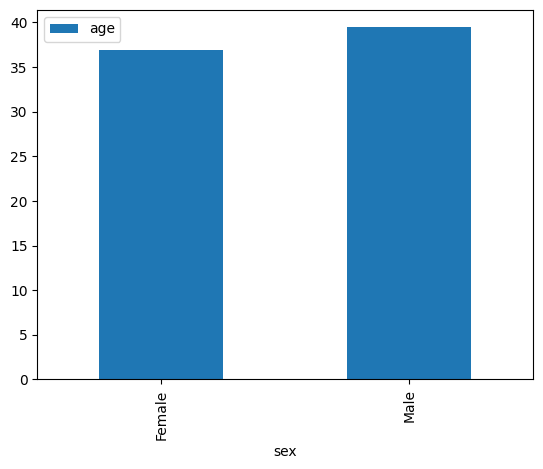

In [134]:
table.plot.bar()
plt.show()

2.สร้าง plot แสดงค่าเฉลี่ยของจำนวนชั่วโมงทำงานต่อสัปดาห์ (hours-per-week) ของตัวอย่างในแต่ละเชื้อชาติ (race)

In [135]:
table = pd.pivot_table(adult,index=['race'],values=['hours-per-week'])
table

,hours-per-week
race,
Amer-Indian-Eskimo,40.048232
Asian-Pac-Islander,40.127045
Black,38.422855
Other,39.468635
White,40.689100


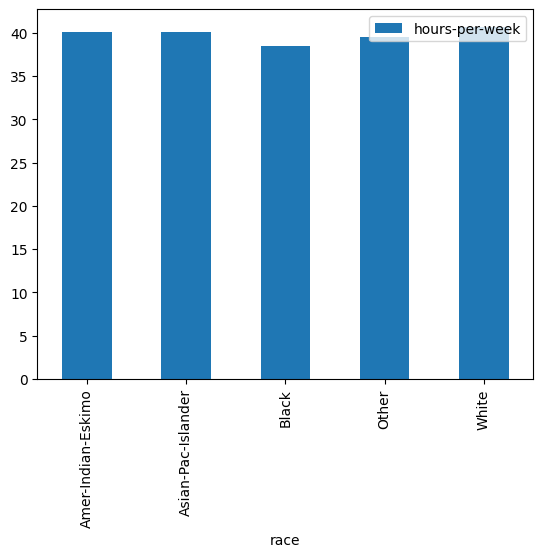

In [136]:
table.plot.bar()
plt.show()